## Categorical

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

In [3]:

train = pd.read_csv("E:/Data Science/data/Titanic/train.csv")
test = pd.read_csv("E:/Data Science/data/Titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Embarked,Age,Cabin missing , Cabin to be dropped rest to be imputed

In [8]:
def contchart(numcols):                  #in class self not in function
    for i in range(len(numcols)):
        sns.displot(x=train[numcols[i]],kde=True)       

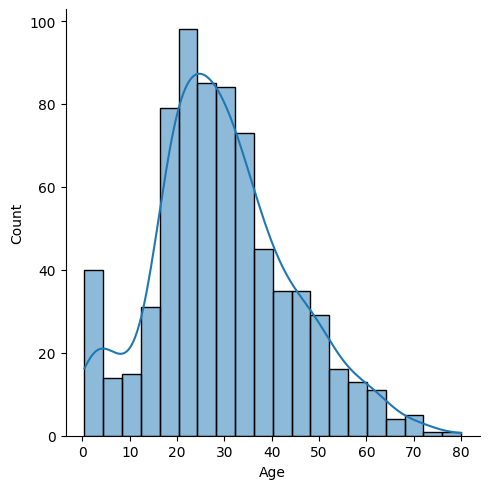

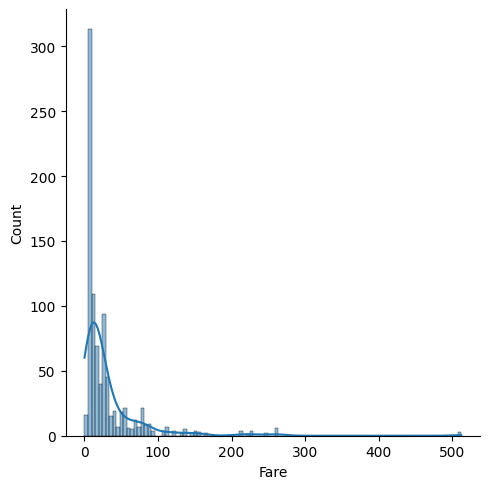

In [9]:
numcols=['Age','Fare']
contchart(numcols)

Fare is highly left skewed
for left, right both skewness do either of following operation on the columns values
* log+1                        : either way
* Squareroot                  : (if only +ve vals)
* cuberoot                    : (+ve or -ve vals)

for some numerical variables binning can be done


In [10]:
train['Fare']=train['Fare'].apply(lambda x: np.log(x+1))

<Axes: ylabel='Density'>

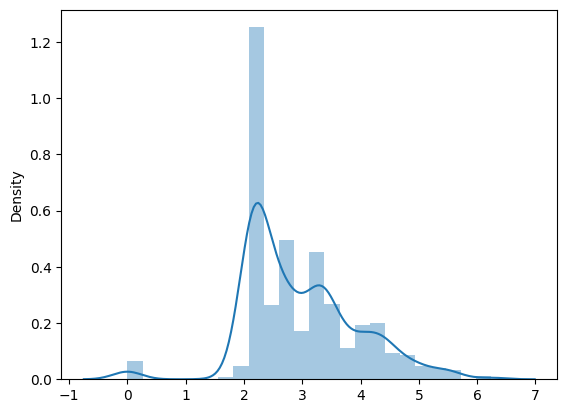

In [11]:
sns.distplot(x=train['Fare'],kde=True)

* now less skewedness

<Axes: xlabel='Survived', ylabel='count'>

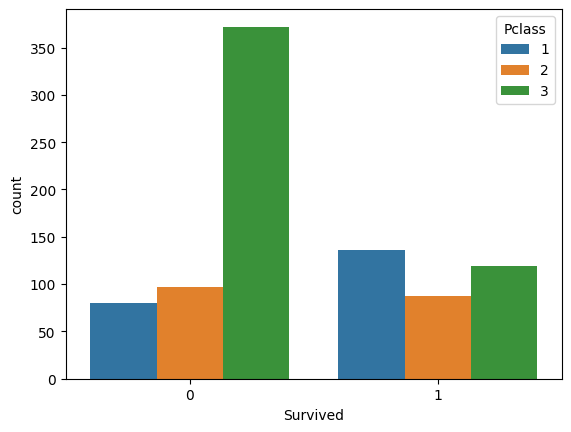

In [12]:
catcols=['Pclass','Sex','Embarked']     # hue => categories of that colmn in 
# function for categorical was merging so individually 
#countplot give either x or y
sns.countplot(data=train,x=train['Survived'],hue=train['Pclass'])

* more people of class 3 died , more people of class 1 survived

<Axes: xlabel='Survived', ylabel='count'>

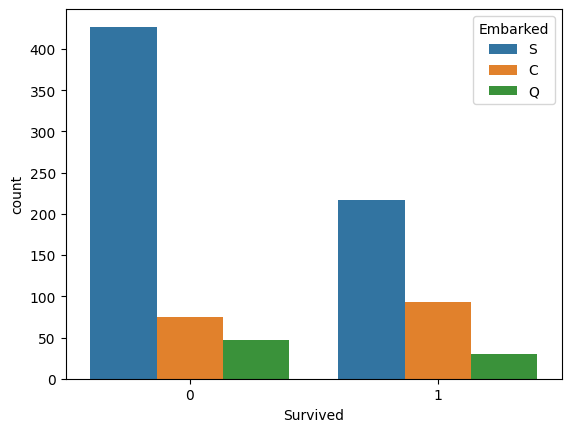

In [13]:
sns.countplot(data=train,x=train['Survived'],hue=train['Embarked'])

<Axes: xlabel='Survived', ylabel='count'>

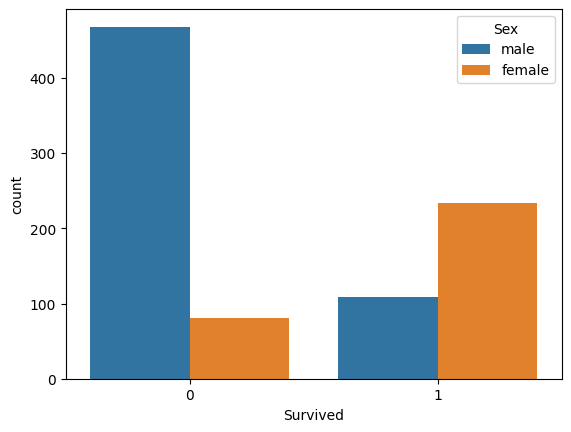

In [14]:
sns.countplot(data=train,x=train['Survived'],hue=train['Sex'])

* more male died than female

In [15]:
train.pivot_table(index='Pclass',values='Survived',aggfunc='sum')

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
print(136/216," ",87/184," ",119/491)

0.6296296296296297   0.47282608695652173   0.24236252545824846


<Axes: xlabel='Fare', ylabel='Age'>

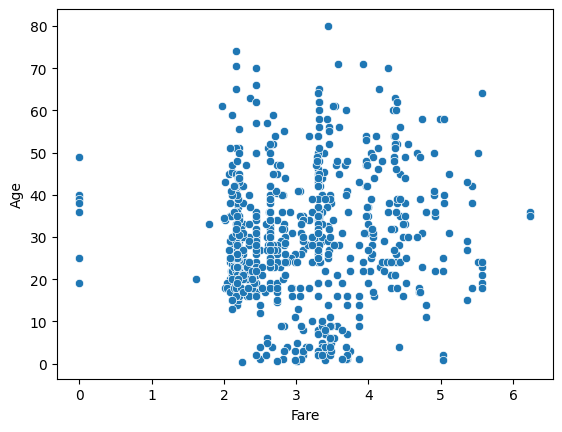

In [18]:
sns.scatterplot(x=train['Fare'],y=train['Age'])

No Regression type relation bw age and fare 

In [19]:
pd.crosstab(train['Sex'],train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [20]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train['Sex'],train['Survived']))

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))